# Loan Prediction

### Problem
A Company wants to check loan eligibility based on customer detail provided.These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others..

### Data

### Variables:
Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Propert_Area,Loan_Status

In [71]:
#Importing Libraries

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Reading the training dataset in a dataframe using Pandas
df= pd.read_csv("C:\\Users\\dell\\Desktop\\Dataset\\loan.csv")

In [74]:
df.shape

(614, 13)

In [75]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [76]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [77]:
#Checked for Missing Values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [78]:
#Missing value imputation for each column which has missing valies

df['Gender'] = df['Gender'].fillna(
df['Gender'].dropna().mode().values[0] )

df['Married'] = df['Married'].fillna(
df['Married'].dropna().mode().values[0] )

df['Dependents'] = df['Dependents'].fillna(
df['Dependents'].dropna().mode().values[0] )

df['Self_Employed'] = df['Self_Employed'].fillna(
df['Self_Employed'].dropna().mode().values[0] )

df['LoanAmount'] = df['LoanAmount'].fillna(
df['LoanAmount'].dropna().median() )

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(
df['Loan_Amount_Term'].dropna().mode().values[0] )

df['Credit_History'] = df['Credit_History'].fillna(
df['Credit_History'].dropna().mode().values[0])

In [79]:
#checked after missing value imputation
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Exploratory Data Analysis

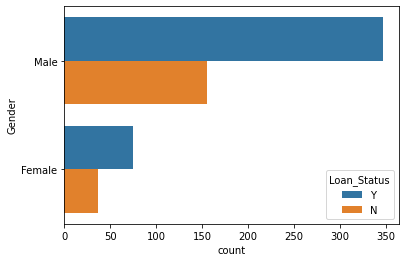

In [80]:
sns.countplot(y='Gender',hue='Loan_Status',data=df)

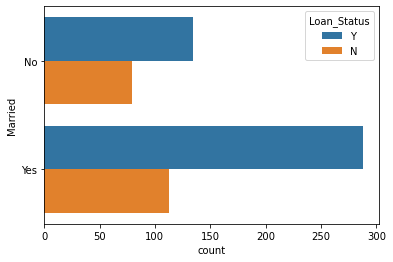

In [81]:
sns.countplot(y='Married',hue='Loan_Status',data=df)

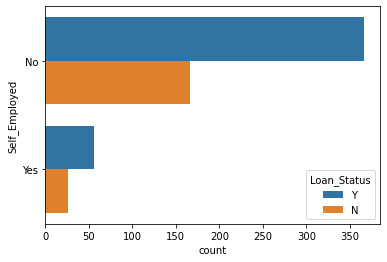

In [82]:
sns.countplot(y='Self_Employed',hue='Loan_Status',data=df)

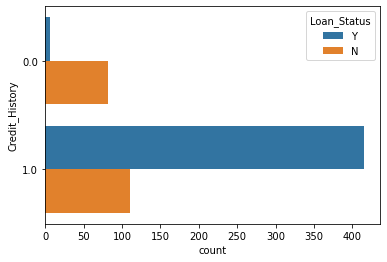

In [83]:
sns.countplot(y='Credit_History',hue='Loan_Status',data=df)

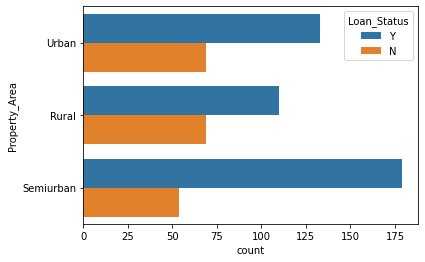

In [84]:
sns.countplot(y='Property_Area',hue='Loan_Status',data=df)

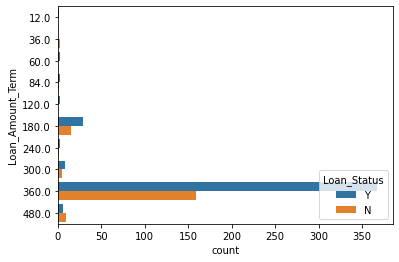

In [85]:
sns.countplot(y='Loan_Amount_Term',hue='Loan_Status',data=df)

### Encoding to Numeric data

In [86]:
code_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate':2, 
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

In [87]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [88]:
df = df.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
#drop the uniques loan id
df.drop('Loan_ID', axis = 1, inplace = True)

In [90]:
#checked if encoding has been done?
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,2,0,1,2,5849,0.0,128.0,360.0,1.0,3,1
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,3,1
4,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3,1


In [ ]:
#check for no. of dependents counts in group

In [91]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [92]:
#checked for data types
df.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [94]:
#Dependents feature is 'object' type ... need to convert it numeric 
Dependents_ = pd.to_numeric(df.Dependents)
df.drop(['Dependents'], axis = 1, inplace = True)
df = pd.concat([df, Dependents_], axis = 1)

In [96]:
#checked to see if feature 'Dependents' converted into int...

df.dtypes

Gender                 int64
Married                int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
Dependents             int64
dtype: object

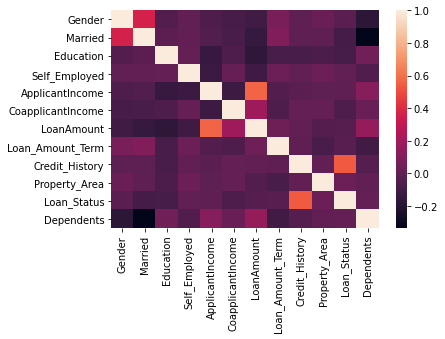

In [97]:
#checked correlation

sns.heatmap(df.corr())

Heatmap Showing above  the correlations of features with the target. No correlations are extremely high. The correlations between LoanAmount and ApplicantIncome can be explained.

In [98]:
#Separating Target from the feature for training

y = df['Loan_Status']
X = df.drop('Loan_Status', axis = 1)
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Using Logistic Regression

In [99]:
model = LogisticRegression()

In [100]:
model.fit(X_train, y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
ypred = model.predict(X_test)
print(ypred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [102]:
evaluation = f1_score(y_test, ypred)
evaluation

0.8979591836734695

### Using Decision Tree

In [103]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [104]:
ypred_tree=tree.predict(X_test)
print(ypred_tree)

[0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1
 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 1 0 0 0 1 1 0 1 0 0]


In [105]:
evaluation_tree=f1_score(y_test,ypred_tree)
evaluation_tree

0.7630057803468209

### Using Random Forest Classifier 

In [106]:
forest=RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [107]:
ypred_forest=forest.predict(X_test)
print(ypred_forest)

[1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [108]:
evaluation_forest=f1_score(y_test,ypred_forest)
evaluation_forest

0.8526315789473685

### Conclusion

From the Exploratory Data Analysis, we could generate insight from the data. How each of the features relates to the target. Also, it can be seen from the evaluation of three models that Logistic Regression performed better than others, Random Forest did better than Decision Tree.